In [52]:
# Pandas & numpy Libraries
import pandas as pd
import numpy as np

# Warnin Library
import warnings

# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Preprocessing Libraries
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer

# ModelPipeLining Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# ErrorMetrics Libraries
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report

# Model saving/Loading Library
import joblib

In [53]:
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
# Duplicate data check:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Exploratory Data Analysis

UniVariate Analysis:
------------------------------
    
1) 81.4% - Male , 18.6% - Female
2) 65.1% - Married, 34.9% - Single
3) 57.6% - 0dependants, 17% - 1dep, 16.9% - 2dep, 8.5% - 3+dep
4) 78.2% - Graduates, 21.8% - Non-Graduates
5) 14.1% - Self-Employed, 85.9% - Not a Self-Emloyed
6) 84.2% - Credit History, 15.8% - No Credit History
7) 37.9% - SemiUrban , 32.9% - Urban, 29.2% - Rural


<Axes: ylabel='Gender'>

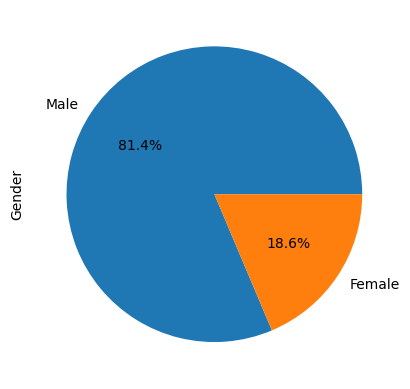

In [7]:
data['Gender'].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='Dependents'>

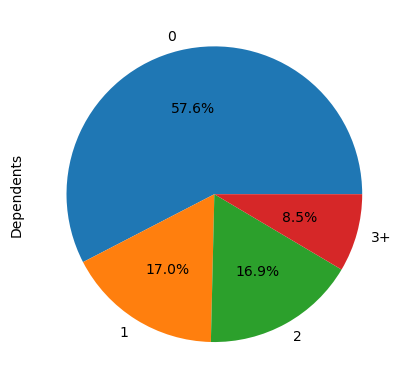

In [8]:
data['Dependents'].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='Married'>

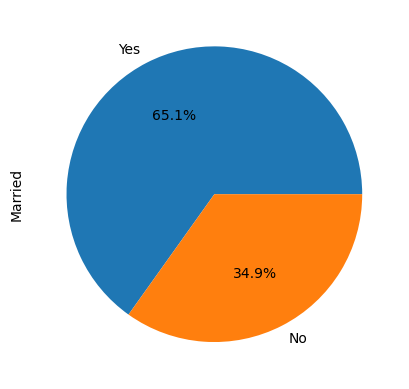

In [9]:
data['Married'].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='Education'>

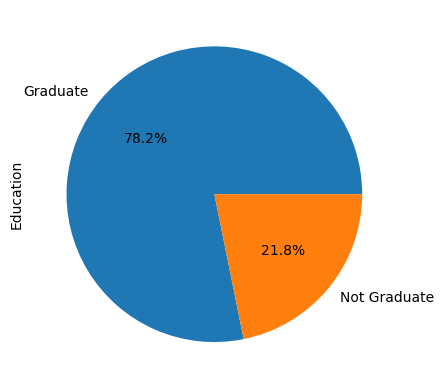

In [10]:
data['Education'].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='Self_Employed'>

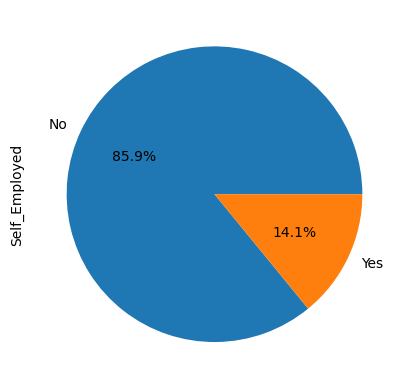

In [11]:
data['Self_Employed'].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='Credit_History'>

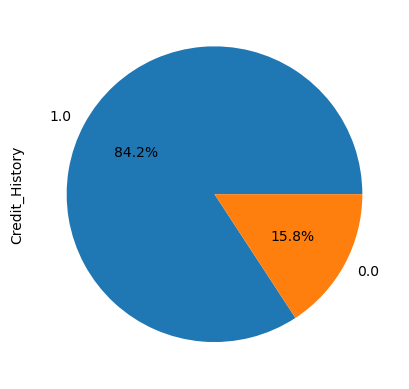

In [12]:
data['Credit_History'].value_counts().plot.pie(autopct = '%1.1f%%')

<Axes: ylabel='Property_Area'>

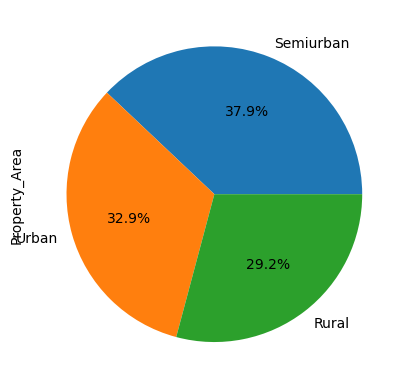

In [13]:
data['Property_Area'].value_counts().plot.pie(autopct = '%1.1f%%')

# BiVariate Analysis : Categorical - Categorical 

1) Bivariate Analysis between Gender & Education:
--------------------------------------------------
Among the 81.4% Male (489), 376 - Graduate & 113 - Non Graduate
Among the 18.6% Female(112), 92 - Graduate &  20 - Non Graduate

2) Bivariate Analysis between Gender & Marital Status
------------------------------------------------------
Among the 81.4% Male (489), 130 - Not Married & 357 - Married
Among the 18.6% Female(112), 80 - Not Married &  31 - Married



In [14]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
data['Gender'].value_counts(), data['Education'].value_counts()

(Male      489
 Female    112
 Name: Gender, dtype: int64,
 Graduate        480
 Not Graduate    134
 Name: Education, dtype: int64)

# Crosstab

In [58]:
Gen_Edu = pd.crosstab(data['Gender'],data['Education'],normalize = 'index')
Gen_Edu   

Education,Graduate,Not Graduate
Gender,,
Female,0.821429,0.178571
Male,0.768916,0.231084


In [62]:
Gen_Edu = pd.crosstab(data['Gender'],data['Education'])
Gen_Edu.apply(lambda x: (x/x.sum())*100,axis = 1)

<Axes: xlabel='Gender'>

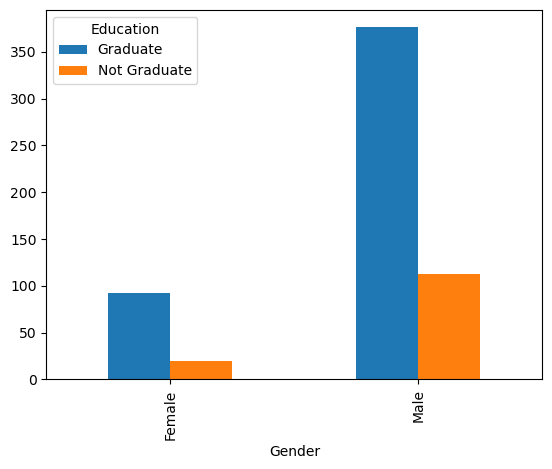

In [64]:
Gen_Edu.plot.bar()

# Mosaic Plot

In [19]:
# Mosaic plot has 4 parameters (data,featuresToBeCompare,labelizer, properties) 
# properties parameter is used to fix color
# labelizer parameter is used to give label and count number in a plot

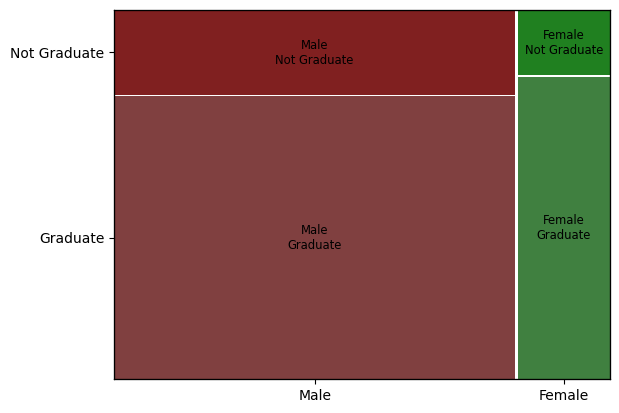

In [20]:
mosaic(data,['Gender','Education'])
plt.show()

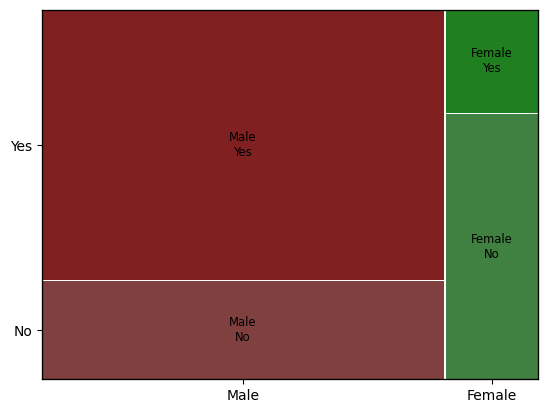

In [21]:
mosaic(data,['Gender','Married'])
plt.show()

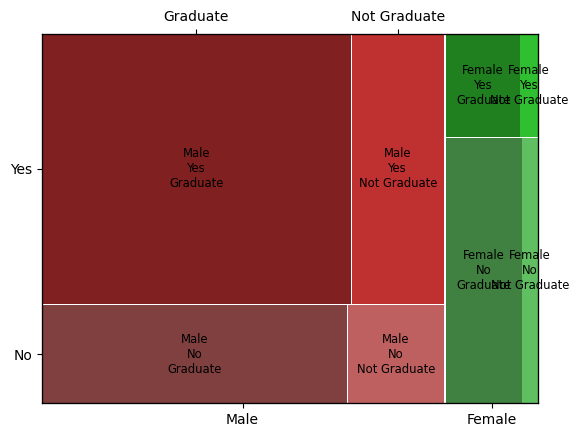

In [22]:
mosaic(data,['Gender','Married','Education'])
plt.show()

In [23]:
pd.crosstab(data['Gender'], data['Married'])

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


<Axes: xlabel='Gender', ylabel='LoanAmount'>

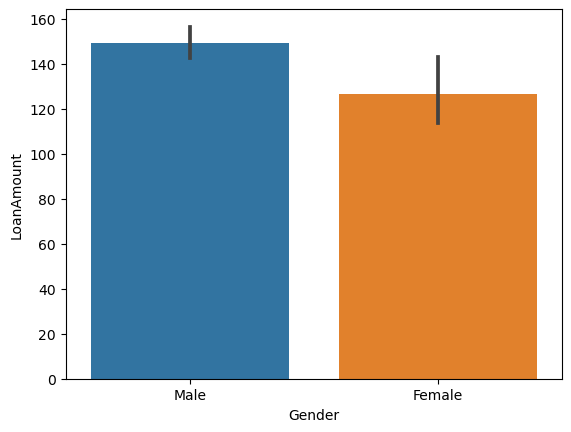

In [24]:
sns.barplot(x=data['Gender'], y=data['LoanAmount'])

# preprocessing

In [25]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
data.select_dtypes('object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
# Identifying Unique Values for Categorical Features :
# ------------------------------------------------------
[(i,data[i].unique()) for i in data.drop(columns = 'Loan_ID').select_dtypes('object').columns]

[('Gender', array(['Male', 'Female', nan], dtype=object)),
 ('Married', array(['No', 'Yes', nan], dtype=object)),
 ('Dependents', array(['0', '1', '2', '3+', nan], dtype=object)),
 ('Education', array(['Graduate', 'Not Graduate'], dtype=object)),
 ('Self_Employed', array(['No', 'Yes', nan], dtype=object)),
 ('Property_Area', array(['Urban', 'Rural', 'Semiurban'], dtype=object)),
 ('Loan_Status', array(['Y', 'N'], dtype=object))]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
# Categorical & Numerical Column names seperation:
# ------------------------------------------------

cat_cols = data.drop(columns=['Loan_ID','Loan_Status']).select_dtypes('object').columns
print(cat_cols)

num_cols = data.select_dtypes(['int','float']).columns
print(num_cols)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [30]:
categorical_preprocessing = Pipeline([
        ('Categorical Imputer',SimpleImputer(strategy='most_frequent')),
        ('Encoding',OneHotEncoder(sparse = False,handle_unknown='ignore'))
    ])

numerical_preprocessing = Pipeline([
        ('Numerical Imputer',SimpleImputer(strategy='mean')),
        ('Scaling',MinMaxScaler())
    ])

In [31]:
Final_preprocessing = ColumnTransformer(
transformers = 
    [
    ('categorical preprocessing',categorical_preprocessing,cat_cols),
    ('numerical preprocessing',numerical_preprocessing,num_cols)      
])

In [32]:
Package = Pipeline([
   ('Preprocessing',Final_preprocessing),
   ('model',LogisticRegression())
])

In [33]:
joblib.dump(Package,'LogisticRegression.pkl')

['LogisticRegression.pkl']

In [34]:
x= data.drop(columns = 'Loan_Status')

In [35]:
y = data['Loan_Status']

In [54]:
Package.fit(x,y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('categorical preprocessing',
                                                  Pipeline(steps=[('Categorical '
                                                                   'Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')),
                                                 ('numerical preprocessing',
                                                  Pipeline(steps=[('Numerical '
                                                                   'Imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [37]:
y_pred = Package.predict(x)

In [38]:
Package.predict_proba(x)

array([[0.27111518, 0.72888482],
       [0.28536363, 0.71463637],
       [0.16717314, 0.83282686],
       ...,
       [0.25719946, 0.74280054],
       [0.15107645, 0.84892355],
       [0.85025581, 0.14974419]])

In [39]:
print("Train Result")
print(confusion_matrix(y, y_pred))

Train Result
[[ 84 108]
 [  9 413]]


In [40]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           N       0.90      0.44      0.59       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614



In [56]:
# Validation purpose on Actual
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [41]:
print('Train Accuracy')
print(accuracy_score(y, y_pred))

Train Accuracy
0.8094462540716613


In [55]:
# Accuracy = (TP+FP)/(TP+FP+TN+FN)
(84+413)/(84+413+108+9) 

0.8094462540716613

# Test Data

In [45]:
test_data = pd.read_csv('test.csv')

In [46]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
test_predict = Package.predict(test_data)

In [48]:
test_data['Loan_Status'] = test_predict

In [49]:
test_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y


In [50]:
Result = test_data[['Loan_ID','Loan_Status']]

In [51]:
Result.to_csv('Loan_Result.csv',index = False)